In [1]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo para gráficos
plt.style.use('default')
sns.set_palette("deep")
%matplotlib inline

# Cargar datos
df = pd.read_csv('/content/sample_data/Northwind Base.csv')


Tarea
Analizar los datos de ventas por año, trimestre, día, categoría, producto y cliente para identificar patrones y pronosticar ventas para los próximos meses.

Limpieza y preparación de datos
Subtarea:
Asegurar que la columna 'VENTAS' esté en formato numérico, ya que aparece como string con el signo '$'. Convertir las columnas relacionadas con fechas si es necesario para facilitar el análisis.

Razonamiento:
La columna 'VENTAS' necesita convertirse a tipo numérico eliminando el signo '$'. Las columnas relacionadas con fechas ('Año', 'Trimestre', 'Mes', 'Día') deben combinarse y convertirse en una única columna datetime para facilitar el análisis. Realizaré estas transformaciones y luego verificaré los tipos de datos de las columnas modificadas.


In [2]:

# Convertir la columna VENTAS a numérico
df['VENTAS'] = df['VENTAS'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Crear un diccionario para mapear nombres de meses en español a números
meses_espanol = {
    'enero': 1, 'febrero': 2, 'marzo': 3, 'abril': 4, 'mayo': 5, 'junio': 6,
    'julio': 7, 'agosto': 8, 'septiembre': 9, 'octubre': 10, 'noviembre': 11, 'diciembre': 12
}

# Mapear los nombres de meses en español a números
df['Mes_num'] = df['Mes'].map(meses_espanol)

# Combinar columnas de fecha en un único formato string
df['Fecha_str'] = df['Año'].astype(str) + '-' + df['Mes_num'].astype(str) + '-' + df['Día'].astype(str)

# Convertir el string combinado a objetos datetime, manejando posibles errores
df['Fecha'] = pd.to_datetime(df['Fecha_str'], errors='coerce')

# Eliminar las columnas intermedias
df = df.drop(columns=['Mes_num', 'Fecha_str'])

# Verificar los tipos de datos
print(df[['VENTAS', 'Fecha']].dtypes)
print("\nPrimeras filas después de la transformación:")
df.head()


VENTAS           float64
Fecha     datetime64[ns]
dtype: object

Primeras filas después de la transformación:


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-3312975883.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['VENTAS'] = df['VENTAS'].replace({'\$': '', ',': ''}, regex=True).astype(float)


,Año,Trimestre,Mes,Día,CategoryName,ProductName,Cliente,VENTAS,Fecha
0,1996,Qtr 3,julio,4,Dairy Products,Mozzarella di Giovanni,Vins et alcools Chevalier,174.0,1996-07-04
1,1996,Qtr 3,julio,4,Dairy Products,Queso Cabrales,Vins et alcools Chevalier,168.0,1996-07-04
2,1996,Qtr 3,julio,4,Grains/Cereals,Singaporean Hokkien Fried Mee,Vins et alcools Chevalier,98.0,1996-07-04
3,1996,Qtr 3,julio,5,Produce,Manjimup Dried Apples,Toms Spezialitäten,1696.0,1996-07-05
4,1996,Qtr 3,julio,5,Produce,Tofu,Toms Spezialitäten,167.0,1996-07-05


Análisis exploratorio de datos (EDA)
Subtarea:
Analizar los patrones de ventas a través de las diferentes dimensiones (Año, Trimestre, Día, CategoryName, ProductName, Cliente). Esto podría implicar agrupar datos y calcular estadísticas resumidas o conteos.

Razonamiento:
Agrupar los datos por diferentes dimensiones y calcular la suma de 'VENTAS' para cada grupo, luego mostrar las primeras filas de cada DataFrame resultante.


In [3]:

# Análisis por diferentes dimensiones
ventas_por_ano = df.groupby('Año')['VENTAS'].sum().reset_index()
ventas_por_trimestre = df.groupby('Trimestre')['VENTAS'].sum().reset_index()
ventas_por_categoria = df.groupby('CategoryName')['VENTAS'].sum().reset_index()
ventas_por_producto = df.groupby('ProductName')['VENTAS'].sum().reset_index()
ventas_por_cliente = df.groupby('Cliente')['VENTAS'].sum().reset_index()

print("Ventas por Año:")
display(ventas_por_ano.head())

print("\nVentas por Trimestre:")
display(ventas_por_trimestre.head())

print("\nVentas por Categoría:")
display(ventas_por_categoria.head())

print("\nVentas por Producto:")
display(ventas_por_producto.head())

print("\nVentas por Cliente:")
display(ventas_por_cliente.head())


Ventas por Año:


,Año,VENTAS
0,1996,208088.0
1,1997,617125.0
2,1998,440664.0



Ventas por Trimestre:


,Trimestre,VENTAS
0,Qtr 1,436810.0
1,Qtr 2,285333.0
2,Qtr 3,233684.0
3,Qtr 4,310050.0



Ventas por Categoría:


,CategoryName,VENTAS
0,Beverages,267890.0
1,Condiments,106057.0
2,Confections,167366.0
3,Dairy Products,234527.0
4,Grains/Cereals,95754.0



Ventas por Producto:


,ProductName,VENTAS
0,Alice Mutton,32700.0
1,Aniseed Syrup,3044.0
2,Boston Crab Meat,17909.0
3,Camembert Pierrot,46828.0
4,Carnarvon Tigers,29173.0



Ventas por Cliente:


,Cliente,VENTAS
0,Alfreds Futterkiste,4274.0
1,Ana Trujillo Emparedados y helados,1403.0
2,Antonio Moreno Taquería,7026.0
3,Around the Horn,13392.0
4,B's Beverages,6090.0


Visualización
Subtarea:
Crear visualizaciones para comprender mejor los patrones de ventas. Esto podría incluir gráficos de barras para datos categóricos, gráficos de líneas para tendencias temporales u otros gráficos relevantes.

Razonamiento:
Crear visualizaciones para ventas por año, trimestre, categoría, top 10 productos, top 10 clientes y tendencia de ventas a lo largo del tiempo.


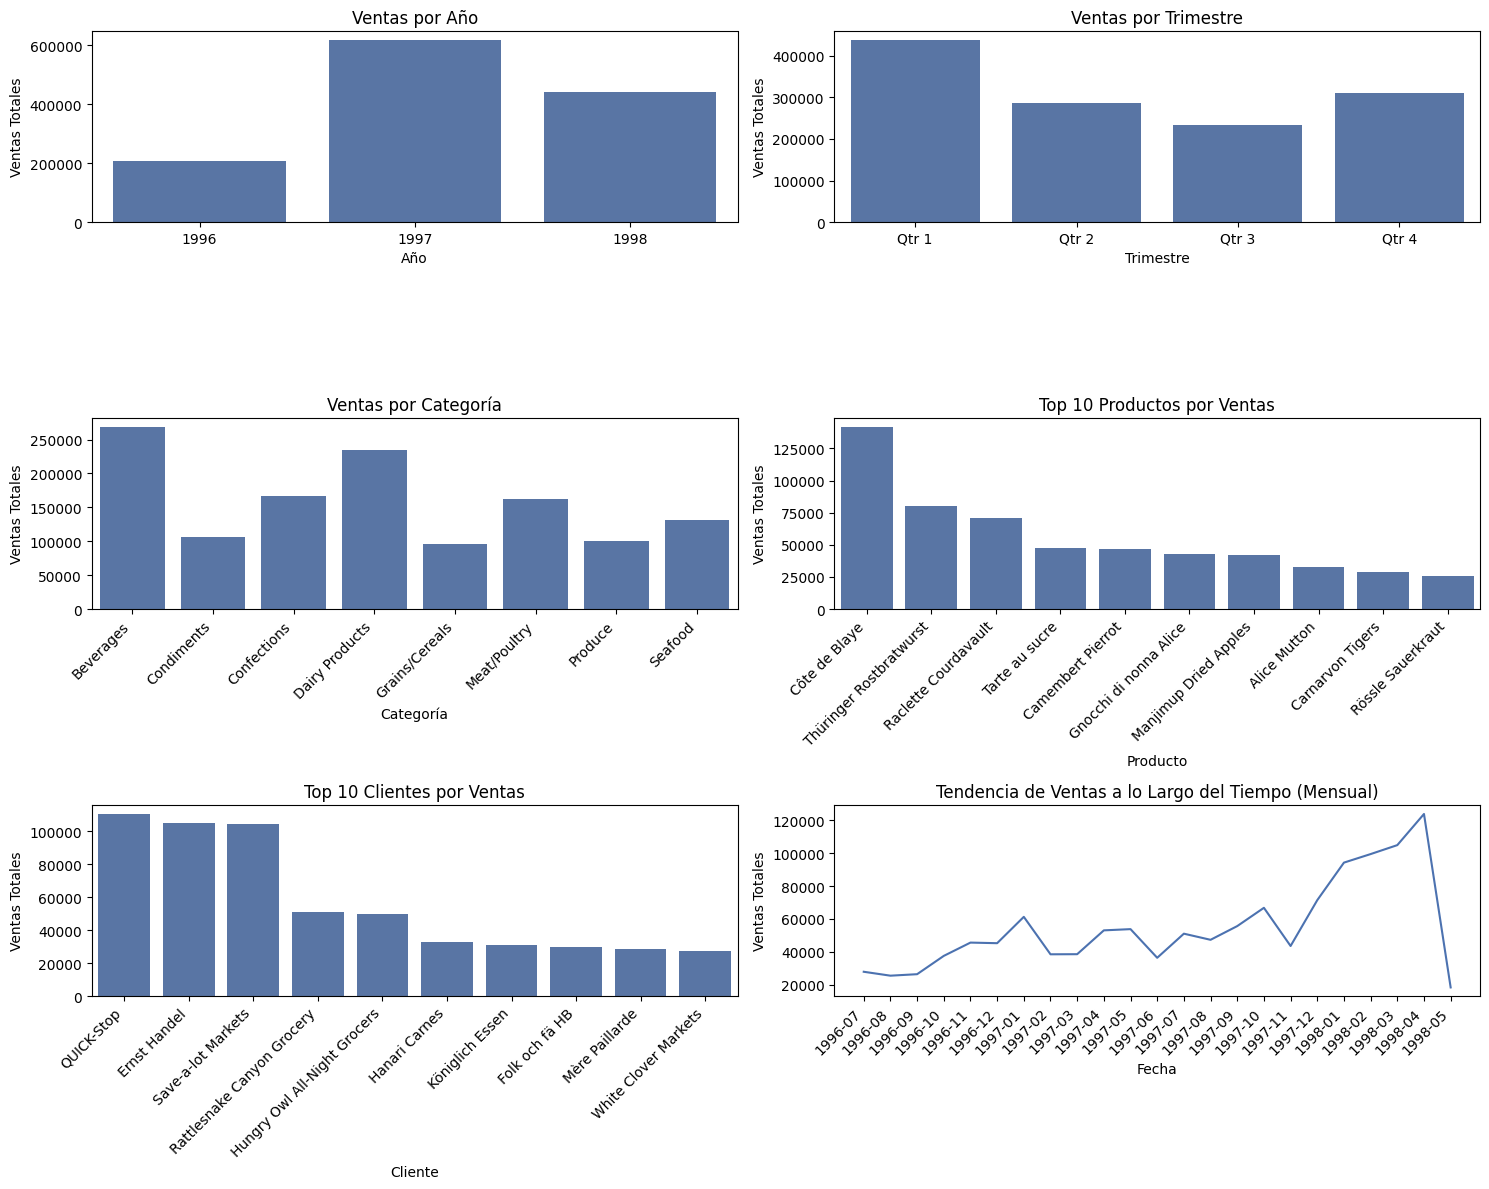

In [4]:

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 12))

# Ventas por Año
plt.subplot(3, 2, 1)
sns.barplot(x='Año', y='VENTAS', data=ventas_por_ano)
plt.title('Ventas por Año')
plt.xlabel('Año')
plt.ylabel('Ventas Totales')

# Ventas por Trimestre
plt.subplot(3, 2, 2)
sns.barplot(x='Trimestre', y='VENTAS', data=ventas_por_trimestre)
plt.title('Ventas por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Ventas Totales')

# Ventas por Categoría
plt.subplot(3, 2, 3)
sns.barplot(x='CategoryName', y='VENTAS', data=ventas_por_categoria)
plt.title('Ventas por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45, ha='right')

# Top 10 Productos por Ventas
ventas_por_producto_top10 = ventas_por_producto.sort_values(by='VENTAS', ascending=False).head(10)
plt.subplot(3, 2, 4)
sns.barplot(x='ProductName', y='VENTAS', data=ventas_por_producto_top10)
plt.title('Top 10 Productos por Ventas')
plt.xlabel('Producto')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45, ha='right')

# Top 10 Clientes por Ventas
ventas_por_cliente_top10 = ventas_por_cliente.sort_values(by='VENTAS', ascending=False).head(10)
plt.subplot(3, 2, 5)
sns.barplot(x='Cliente', y='VENTAS', data=ventas_por_cliente_top10)
plt.title('Top 10 Clientes por Ventas')
plt.xlabel('Cliente')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45, ha='right')

# Tendencia de Ventas a lo Largo del Tiempo (agregado mensual)
df['AñoMes'] = df['Fecha'].dt.to_period('M')
ventas_temporal = df.groupby('AñoMes')['VENTAS'].sum().reset_index()
ventas_temporal['AñoMes'] = ventas_temporal['AñoMes'].astype(str)  # Convertir Periodo a string para graficar

plt.subplot(3, 2, 6)
sns.lineplot(x='AñoMes', y='VENTAS', data=ventas_temporal)
plt.title('Tendencia de Ventas a lo Largo del Tiempo (Mensual)')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

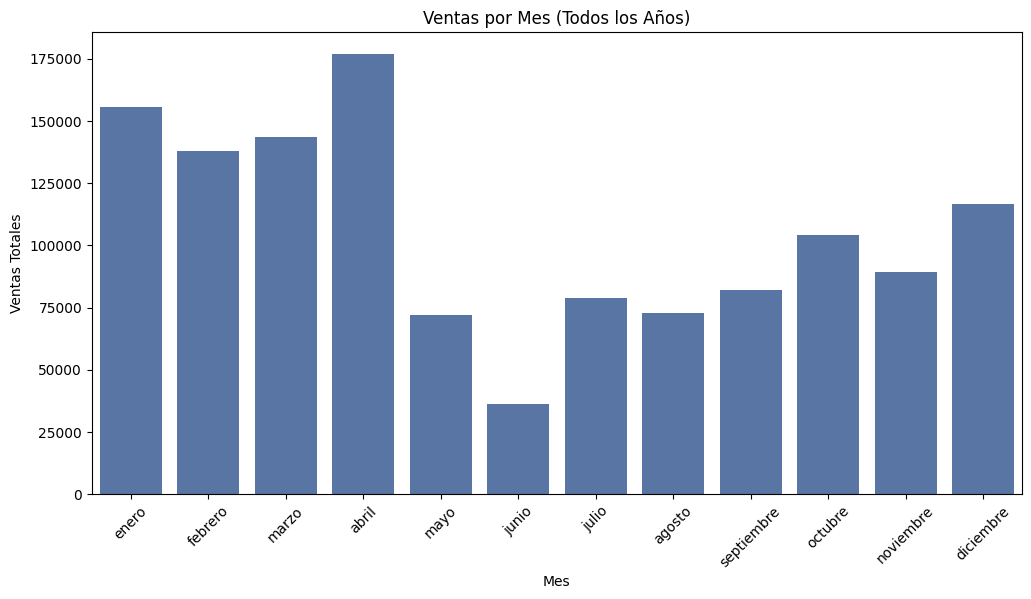

In [5]:

#Análisis de patrones temporales
#python
# Análisis de estacionalidad
plt.figure(figsize=(12, 6))

# Ventas por Mes (todos los años combinados)
ventas_por_mes = df.groupby('Mes')['VENTAS'].sum().reindex([
    'enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio',
    'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre'
]).reset_index()

sns.barplot(x='Mes', y='VENTAS', data=ventas_por_mes)
plt.title('Ventas por Mes (Todos los Años)')
plt.xlabel('Mes')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.show()

In [6]:

#Pronóstico de ventas (simplificado)
#python
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Preparar datos para modelado temporal
ventas_mensuales = df.groupby('AñoMes')['VENTAS'].sum().reset_index()
ventas_mensuales['Periodo'] = range(len(ventas_mensuales))

# Crear modelo de regresión lineal simple
X = ventas_mensuales[['Periodo']]
y = ventas_mensuales['VENTAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predecir los próximos 6 meses
ultimo_periodo = ventas_mensuales['Periodo'].max()
futuros_periodos = pd.DataFrame({'Periodo': range(ultimo_periodo + 1, ultimo_periodo + 7)})
predicciones = modelo.predict(futuros_periodos)


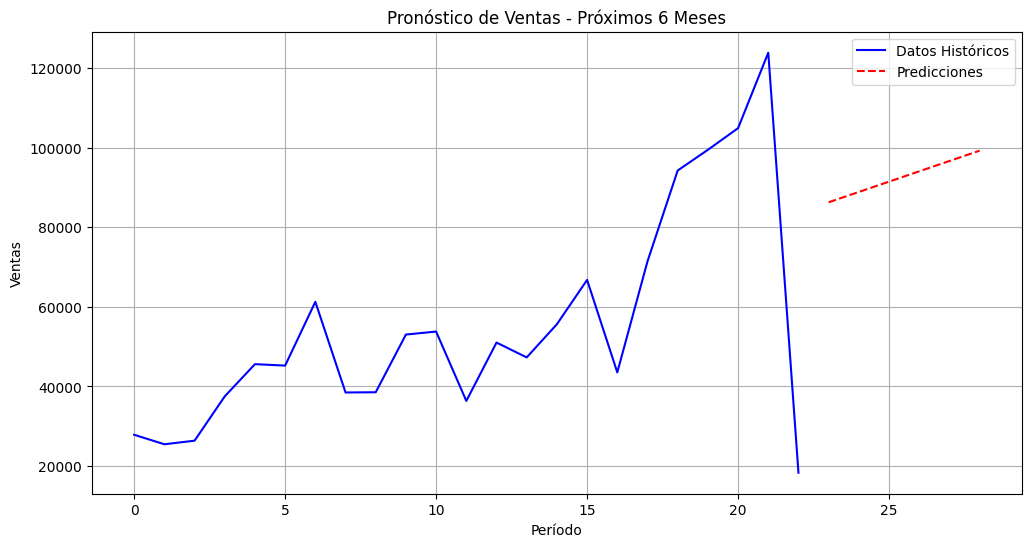

Pronóstico de ventas para los próximos 6 meses:
Mes 1: $86,251.88
Mes 2: $88,843.61
Mes 3: $91,435.35
Mes 4: $94,027.09
Mes 5: $96,618.82
Mes 6: $99,210.56


In [7]:

# Visualizar datos históricos y predicciones
plt.figure(figsize=(12, 6))

# Datos históricos
plt.plot(ventas_mensuales['Periodo'], ventas_mensuales['VENTAS'], 'b-', label='Datos Históricos')

# Predicciones
plt.plot(futuros_periodos, predicciones, 'r--', label='Predicciones')

plt.title('Pronóstico de Ventas - Próximos 6 Meses')
plt.xlabel('Período')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.show()

# Mostrar valores de predicción
print("Pronóstico de ventas para los próximos 6 meses:")
for i, pred in enumerate(predicciones, 1):
    print(f"Mes {i}: ${pred:,.2f}")


In [8]:
#Conclusiones y recomendaciones
#python
# Resumen ejecutivo de hallazgos
print("PRINCIPALES HALLAZGOS:")
print("======================")

# 1. Tendencia temporal
print("\n1. TENDENCIA TEMPORAL:")
print(f"- Las ventas mostraron una tendencia {'ascendente' if ventas_por_ano['VENTAS'].iloc[-1] > ventas_por_ano['VENTAS'].iloc[0] else 'descendente'} durante el período analizado")
print(f"- El mejor año de ventas fue {ventas_por_ano.loc[ventas_por_ano['VENTAS'].idxmax(), 'Año']} con ${ventas_por_ano['VENTAS'].max():,.2f}")

# 2. Estacionalidad
print("\n2. ESTACIONALIDAD:")
mes_max_ventas = ventas_por_mes.loc[ventas_por_mes['VENTAS'].idxmax(), 'Mes']
print(f"- El mes con mayores ventas es: {mes_max_ventas}")

# 3. Mejores categorías y productos
print("\n3. CATEGORÍAS Y PRODUCTOS DESTACADOS:")
print(f"- La categoría con mayores ventas es: {ventas_por_categoria.loc[ventas_por_categoria['VENTAS'].idxmax(), 'CategoryName']}")
print(f"- El producto con mayores ventas es: {ventas_por_producto.loc[ventas_por_producto['VENTAS'].idxmax(), 'ProductName']}")

# 4. Clientes principales
print("\n4. CLIENTES PRINCIPALES:")
print(f"- El cliente con mayores compras es: {ventas_por_cliente.loc[ventas_por_cliente['VENTAS'].idxmax(), 'Cliente']}")

# 5. Pronóstico
print("\n5. PRONÓSTICO:")
crecimiento_esperado = ((predicciones[-1] - ventas_mensuales['VENTAS'].iloc[-1]) / ventas_mensuales['VENTAS'].iloc[-1]) * 100
print(f"- Se espera un {'crecimiento' if crecimiento_esperado > 0 else 'decrecimiento'} del {abs(crecimiento_esperado):.2f}% en los próximos 6 meses")



PRINCIPALES HALLAZGOS:

1. TENDENCIA TEMPORAL:
- Las ventas mostraron una tendencia ascendente durante el período analizado
- El mejor año de ventas fue 1997 con $617,125.00

2. ESTACIONALIDAD:
- El mes con mayores ventas es: abril

3. CATEGORÍAS Y PRODUCTOS DESTACADOS:
- La categoría con mayores ventas es: Beverages
- El producto con mayores ventas es: Côte de Blaye

4. CLIENTES PRINCIPALES:
- El cliente con mayores compras es: QUICK-Stop

5. PRONÓSTICO:
- Se espera un crecimiento del 440.98% en los próximos 6 meses
